In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('Pandas/data/311_Service_Requests_from_2010_to_Present.csv')

/Users/indranilgupta/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [10]:
df.shape

(300698, 53)

In [11]:
df.isnull().sum()/len(df)*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [12]:
#Dropping columns with more than 30% missing values:
df.drop(labels=['Intersection Street 1',
                     'Intersection Street 2',
                     'Landmark',
                     'Vehicle Type',
                     'School or Citywide Complaint', 
                     'Taxi Company Borough',
                     'Taxi Pick Up Location',
                     'Bridge Highway Name',
                     'Bridge Highway Direction',
                     'Road Ramp',
                     'Bridge Highway Segment',
                     'Garage Lot Name',
                     'Ferry Direction',
                     'Ferry Terminal Name',
                     ],axis=1,inplace=True)

In [13]:
#percentage of missing values greater than 5% and less than 30%: Replacing values with mode
df['Incident Address'].fillna(value=df['Incident Address'].mode()[0],inplace=True)
df['Street Name'].fillna(value=df['Street Name'].mode()[0],inplace=True)
df['Cross Street 1'].fillna(value=df['Cross Street 1'].mode()[0],inplace=True)
df['Cross Street 2'].fillna(value=df['Cross Street 2'].mode()[0],inplace=True)

In [14]:
#percentage of missing value in column is less than 5%, so dropping rows:
['Closed Date','Descriptor','Location Type','Incident Zip','Adddress Type','City','Facility Type','Due Date',
 'Resolution Action updated Date','X Coordinate (State Plane)','Y Coordinate (State Plane)','School Region',
 'School Code','School Zip','Latitude','Longitude','Location']

df.dropna(inplace=True)

In [27]:
df.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number               

In [28]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [29]:
d = df['Closed Date'] - df['Created Date']

In [30]:
df['seconds_to_solve'] = d.dt.seconds

In [32]:
df['hours_to_solve'] = df['seconds_to_solve'] / 3600

In [33]:
df['Agency Name'].unique()

array(['New York City Police Department'], dtype=object)

In [34]:
df['Agency Name'].value_counts()

New York City Police Department    290881
Name: Agency Name, dtype: int64

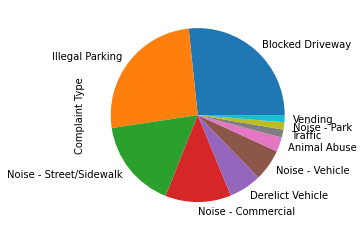

In [35]:
df['Complaint Type'].value_counts().head(10).plot(kind='pie')

In [39]:
df['Location Type'].value_counts()

Street/Sidewalk               242760
Store/Commercial               19425
Club/Bar/Restaurant            17172
Residential Building/House      5752
Park/Playground                 4246
House of Worship                 920
Residential Building             226
Parking Lot                      116
House and Store                   93
Vacant Lot                        77
Commercial                        62
Subway Station                    22
Roadway Tunnel                     5
Highway                            5
Name: Location Type, dtype: int64

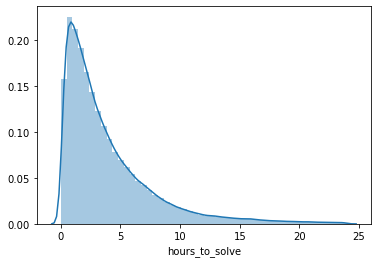

In [40]:
sns.distplot(df['hours_to_solve'])

In [41]:
df['hours_to_solve'].describe()

count    290881.000000
mean          3.925422
std           3.857343
min           0.000000
25%           1.266667
50%           2.684722
75%           5.257500
max          23.998611
Name: hours_to_solve, dtype: float64

**Major insights/patterns observed:**

- **Top 5 Complaints:** 

    . Blocked Driveway             
    . Illegal Parking              
    . Noise - Street/Sidewalk      
    . Noise - Commercial           
    . Derelict Vehicle    


- **Top 5 'Location type' having maximum service request Complaints:**

    . Street/Sidewalk             
    . Store/Commercial              
    . Club/Bar/Restaurant      
    . Residential Building/House           
    . Park/Playground  
    
    
- Out of the 3 Agencies, maximum complaints falls under the **New York City Police Department.**


- The overall average Request_Closing Time for service request complaints is **3.92 hrs.**


- All service request complaints are solved under 24hrs.

In [82]:
df_location_hours = df[['Location Type','hours_to_solve']]

In [88]:
df_hours_solve_location_type = df_location_hours.groupby(by='Location Type').mean()

In [89]:
df_hours_solve_location_type

,hours_to_solve
Location Type,
Club/Bar/Restaurant,2.913868
Commercial,4.568575
Highway,6.781389
House and Store,4.497133
House of Worship,2.964972
Park/Playground,3.252569
Parking Lot,4.305261
Residential Building,4.401292
Residential Building/House,4.735341


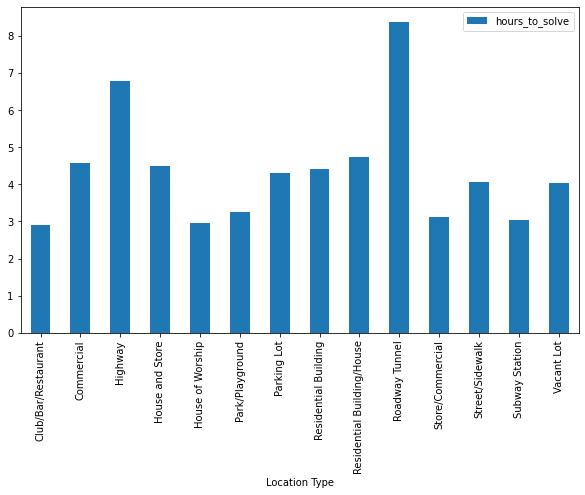

In [84]:
fig,ax = plt.subplots(figsize=(10,6))
df_hours_solve_location_type.plot(kind='bar',ax=ax)

In [85]:
df1 = df_hours_solve_location_type.reset_index()

In [87]:
df1.keys()

Index(['Location Type', 'hours_to_solve'], dtype='object')

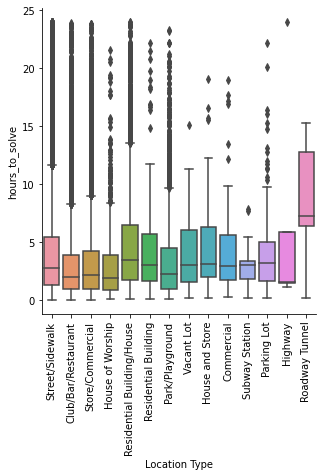

In [48]:
fig = sns.catplot(x='Location Type',y='hours_to_solve',kind='box',data=df)
fig.set_xticklabels(rotation=90)

**Hypothesis testing:**

H0: Average response time for street/sidewalk and Club/Bar/Restaurant is same 

**(mean of hours_to_Solve for street/sidewalk = mean of hours_to_Solve for Club/Bar/Restaurant)**

HA: Average response time for street/sidewalk and Club/Bar/Restaurant is not same

**(mean of hours_to_Solve for street/sidewalk $\not =$ mean of hours_to_Solve for Club/Bar/Restaurant)**

In [161]:
g1 = df[['hours_to_solve','Location Type']].groupby(by='Location Type')
g1.mean()

,hours_to_solve
Location Type,
Club/Bar/Restaurant,2.913868
Commercial,4.568575
Highway,6.781389
House and Store,4.497133
House of Worship,2.964972
Park/Playground,3.252569
Parking Lot,4.305261
Residential Building,4.401292
Residential Building/House,4.735341


In [152]:
club_bar_restaurant = g1.get_group('Club/Bar/Restaurant')
street_sidewalk = g1.get_group('Street/Sidewalk')

In [153]:
m1 = club_bar_restaurant.mean()
s1 = club_bar_restaurant.std() # dof = n-1

m2= street_sidewalk.mean()
s2 = street_sidewalk.std()


print('Mean for Club/Bar/Restaurant {} \n Mean for Street/Sidewalk {}'.format(m1,m2))
print('Std for Club/Bar/Restaurant {} \n Std for Street/Sidewalk {}'.format(s1,s2))

Mean for Club/Bar/Restaurant hours_to_solve    2.913868
dtype: float64 
 Mean for Street/Sidewalk hours_to_solve    4.056685
dtype: float64
Std for Club/Bar/Restaurant hours_to_solve    3.002439
dtype: float64 
 Std for Street/Sidewalk hours_to_solve    3.939595
dtype: float64


In [154]:
n1 = len('Club/Bar/Restaurant')
n2 = len('Street/Sidewalk')
print(n1,n2)

19 15


In [155]:
dof = n1+n2-2
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

SP_2 = hours_to_solve    12.674136
dtype: float64


In [156]:
sp = np.sqrt(sp_2)
print('SP',sp)

SP hours_to_solve    3.560075
dtype: float64


In [157]:
# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
t_val[0]

-0.9293955570790884

In [158]:
dof

32

In [159]:
from scipy import stats

In [160]:
# t-distribution
stats.t.cdf(-0.929395,dof) # it will return p-value

0.17982136548654382

In [131]:
stats.t.ppf(0.975,dof) # it will return t-value

2.036933343460101

In [132]:
# t-distribution
stats.t.ppf(0.025,dof) # it will return t-value

-2.036933343460101

In [139]:
club_bar_restaurant = g1.get_group('Club/Bar/Restaurant')
commercial = g1.get_group('Commercial')

In [140]:
m1 = club_bar_restaurant.mean()
s1 = club_bar_restaurant.std() # dof = n-1

m2= commercial.mean()
s2 = commercial.std()


print('Mean for Club/Bar/Restaurant {} \n Mean for Commercial {}'.format(m1,m2))
print('Std for Club/Bar/Restaurant {} \n Std for Commercial {}'.format(s1,s2))

Mean for Club/Bar/Restaurant hours_to_solve    2.913868
dtype: float64 
 Mean for Commercial hours_to_solve    4.568575
dtype: float64
Std for Club/Bar/Restaurant hours_to_solve    3.002439
dtype: float64 
 Std for Commercial hours_to_solve    4.478273
dtype: float64


In [141]:
n1 = len('Club/Bar/Restaurant')
n2 = len('Commercial')
print(n1,n2)

19 10


In [142]:
dof = n1+n2-2
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

SP_2 = hours_to_solve    16.374833
dtype: float64


In [143]:
sp = np.sqrt(sp_2)
print('SP',sp)

SP hours_to_solve    4.046583
dtype: float64


In [144]:
# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
t_val[0]

-1.0466720298030563

In [145]:
dof

27

In [146]:
from scipy import stats

In [147]:
# t-distribution
stats.t.cdf(-1.04667,dof) # it will return p-value

0.15226594154702466